In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import yfinance as yf
import bs4 as bs
import requests
plt.style.use('fivethirtyeight')

In [3]:
# Scrap sp500 tickers
def save_sp500_tickers():

    resp = requests.get('http://en.wikipedia.org/wiki/List_of_S%26P_500_companies')
    soup = bs.BeautifulSoup(resp.text, 'html')
    table = soup.find('table', {'class': 'wikitable sortable'})
    tickers = []
    for row in table.findAll('tr')[1:]:
        ticker = row.findAll('td')[0].text
        if not '.' in ticker:
            tickers.append(ticker.replace('\n',''))
        
    return tickers

tickers = save_sp500_tickers()
prices = yf.download(tickers, start='2020-01-01')['Adj Close']


#let us apply log to the values to visualize them better
#we will subtract each closing stock price from yesterday's closing price to get returns    
rs = prices.apply(np.log).diff(1)

[*********************100%***********************]  500 of 500 completed


Text(22.33333333333333, 0.5, 'Log returns')

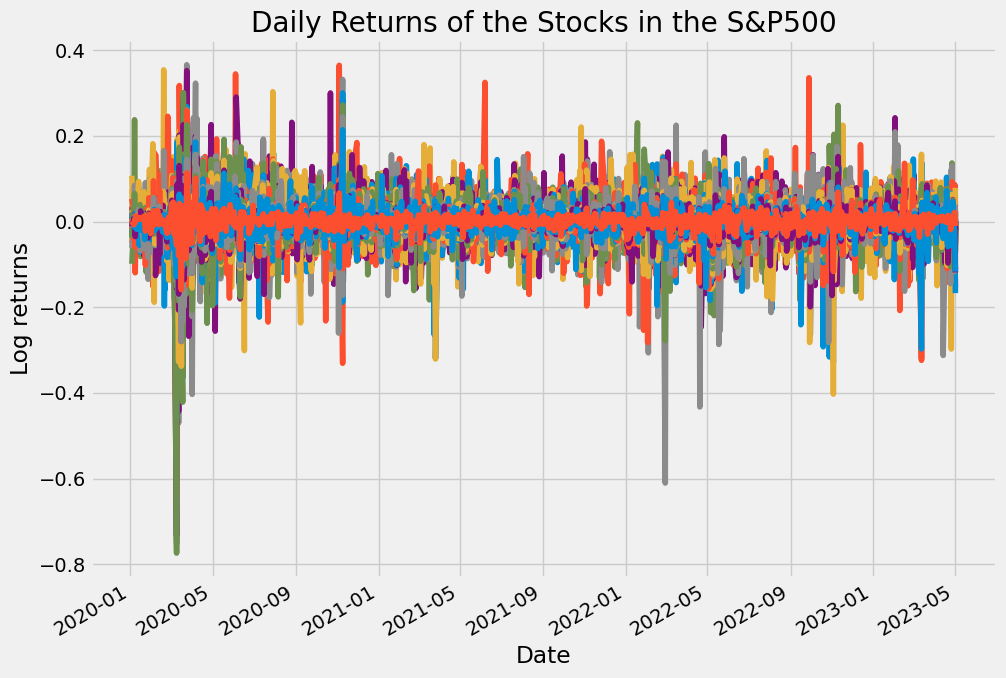

In [4]:
#Lets try to visualize the returns of each stock on a daily basis from 1st Jan 2020 to available date
rs.plot(legend=0, figsize=(10,7), grid=True, title='Daily Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.ylabel('Log returns')

Text(44.70833333333333, 0.5, 'Log cumulative returns')

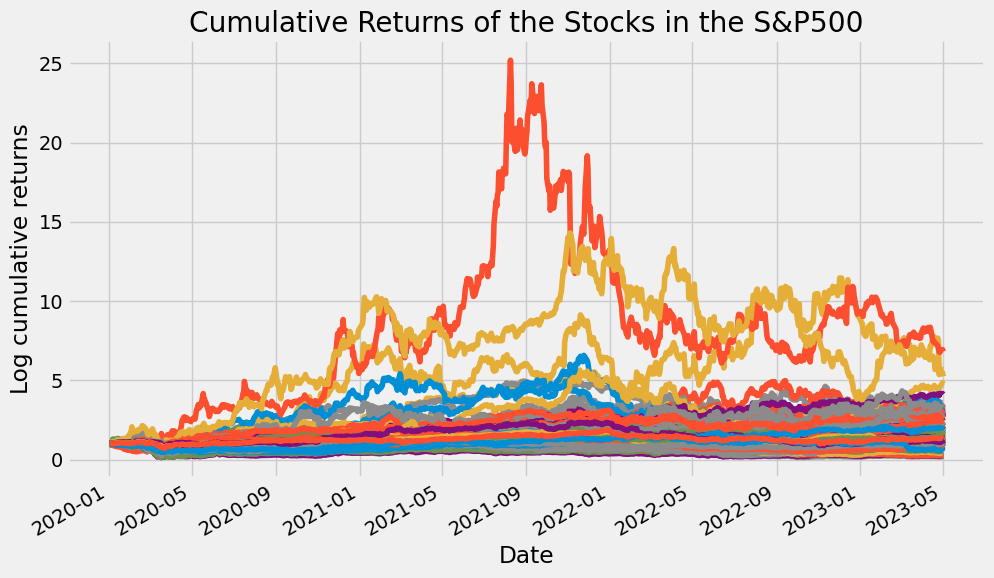

In [5]:
#Lets now try to visualize the cumulative returns daily
(rs.cumsum().apply(np.exp)).plot(legend=0, figsize=(10,6), grid=True, title='Cumulative Returns of the Stocks in the S&P500')
plt.tight_layout()
plt.ylabel("Log cumulative returns")

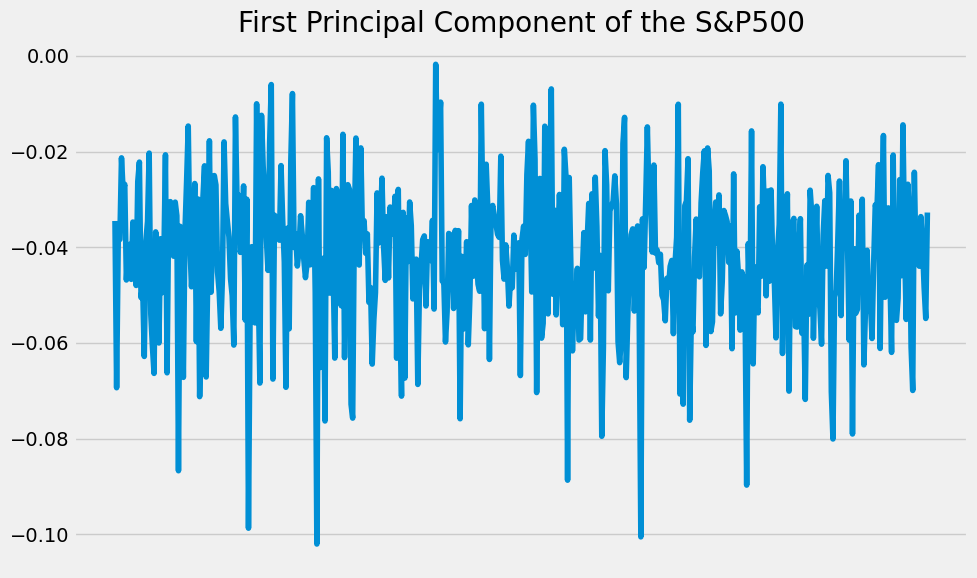

In [6]:
from sklearn.decomposition import PCA

pca = PCA(1).fit(rs.fillna(0))

pc1 = pd.Series(index=rs.columns, data=pca.components_[0])

pc1.plot(figsize=(10,6), xticks=[], grid=True, title='First Principal Component of the S&P500')
plt.tight_layout()

[*********************100%***********************]  1 of 1 completed


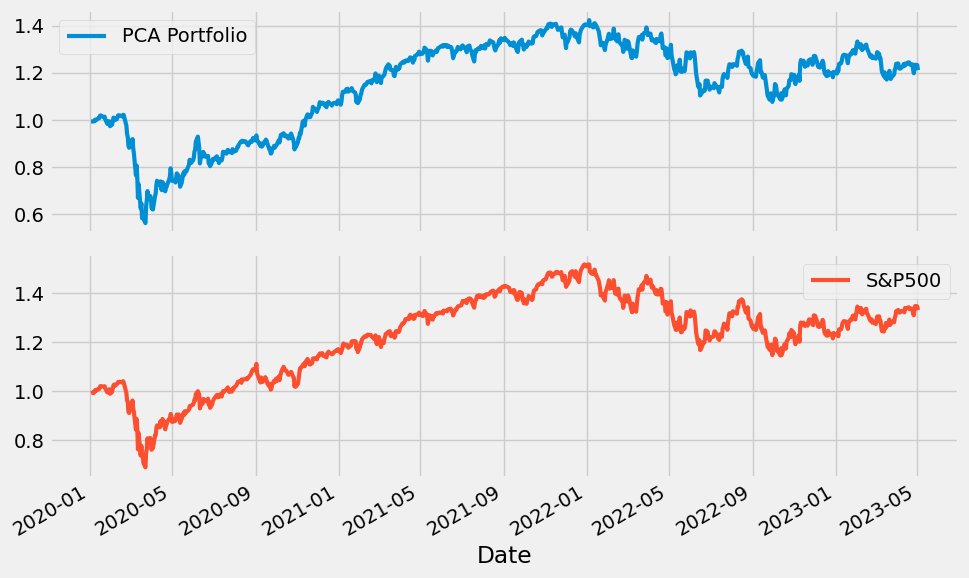

In [10]:
prices = yf.download(['SPY'], start='2020-01-01')['Adj Close'] 


weights = abs(pc1)/sum(abs(pc1))
myrs = (weights*rs).sum(1)

rs_df = pd.concat([myrs, prices.apply(np.log).diff(1)], axis = 1)
rs_df.columns = ["PCA Portfolio", "S&P500"]
 
rs_df.dropna().cumsum().apply(np.exp).plot(subplots=True, figsize=(10,6), grid=True, linewidth=3)
plt.tight_layout()

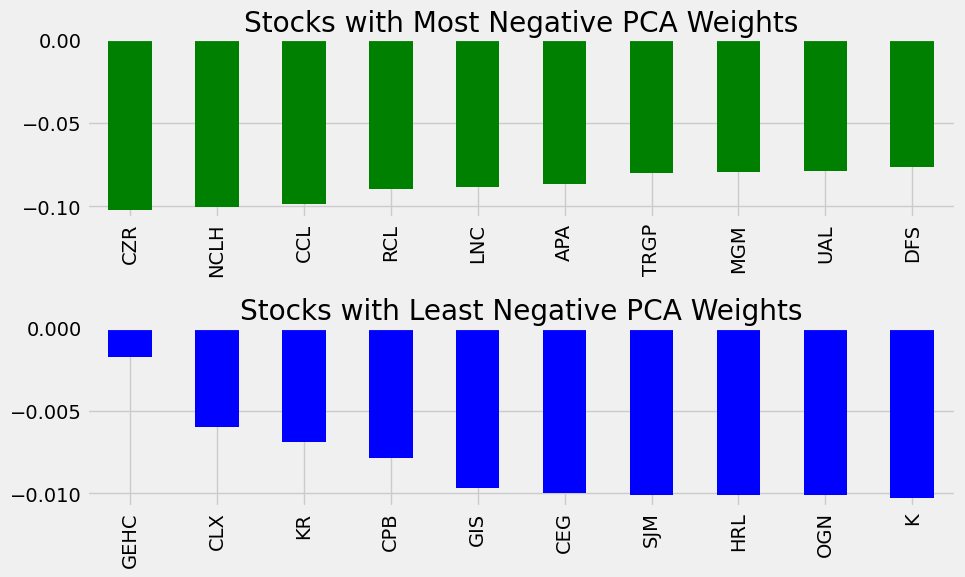

In [11]:
fig, ax = plt.subplots(2,1, figsize=(10,6))
pc1.nsmallest(10).plot.bar(ax=ax[0], color='green', grid=True, title='Stocks with Most Negative PCA Weights')
pc1.nlargest(10).plot.bar(ax=ax[1], color='blue', grid=True, title='Stocks with Least Negative PCA Weights')

plt.tight_layout()